In [1]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read all the stocks dataframe
META = pd.read_csv('META.csv')
NFLX = pd.read_csv('NFLX.csv')
TSLA = pd.read_csv('TSLA.csv')
ORCL = pd.read_csv('ORCL.csv')
MSFT = pd.read_csv('MSFT.csv')
GOOG = pd.read_csv('GOOG.csv')
AAPL = pd.read_csv('AAPL.csv')
SAP = pd.read_csv('SAP.csv')
IBM = pd.read_csv('IBM.csv')
AMZN = pd.read_csv('AMZN.csv')

1. On Jan 02 2018, you split the $\$5m$ into 5 $\$1m$, and use them to buy 5 symbol_stocks from the 10 symbol_stocks. For example, IBM close price was $\$154.25$. With $\$1m$, you can buy max 6482 shares with cost $\$999848.5$ with $\$151.5$‬ cash left. You decided to spend $\$1m$ on each of `['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN']` respectively and keep the rest cash into a zero-interest cash account. On Jan 02 2018, your mark to market value (MTM) is $\$5m$ if combining all symbol_stocks value and cash. Your holdings of symbol_stocks and cach account is your portfolio.

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}

In [3]:
# Take all stock Dataframe and concat the result
market_stocks_values = pd.concat([IBM[['Close', 'Adj Close']],
                                  MSFT[['Close', 'Adj Close']],
                                  GOOG[['Close', 'Adj Close']],
                                  AAPL[['Close', 'Adj Close']],
                                  AMZN[['Close', 'Adj Close']],
                                  META[['Close', 'Adj Close']],
                                  NFLX[['Close', 'Adj Close']],
                                  TSLA[['Close', 'Adj Close']],
                                  ORCL[['Close', 'Adj Close']],
                                  SAP[['Close', 'Adj Close']]], axis=1)

# Making columns 'Close', 'Adj Close' for all stocks
market_stocks_values.columns = [f'{symbol}_{col}' for symbol in ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP'] for col in ['Close', 'Adj Close']]

market_stocks_values.insert(0, 'Date', IBM['Date'])

symbol_stocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']
# my_selected_stocks = random.sample(symbol_stocks,5)
my_selected_stocks =['MSFT','AMZN','AAPL','GOOG','SAP']
# labmda function to get budget  for each stock
get_budget_per_stocks = lambda MTM, my_selected_stocks: int(MTM / len(my_selected_stocks))

# labmda function to get recent date
get_data_using_date = lambda date: market_stocks_values.loc[market_stocks_values['Date'] == date]


In [4]:
# get the close value for all data called during function call stocks
def get_close_data_stocks(date_data, my_selected_stocks):
    data = {}
    
    for stock in my_selected_stocks:
        closing_stock_column = f"{stock}_Close"
        closing_stock_data = date_data[closing_stock_column].values.tolist()
        data[closing_stock_column] = closing_stock_data    
    return data

# get the adj clode value for data called during function call stocks
def get_adj_close_data_stocks(date_data, my_selected_stocks):
    data = {}
    
    for stock in my_selected_stocks:
        closing_stock_column = f"{stock}_Adj Close"
        closing_stock_data = date_data[closing_stock_column].values.tolist()
        data[closing_stock_column] = closing_stock_data
        
    return data

In [5]:
# Initial according to given parameters
max_shares = 6482
cash = 0
investment = 0
MTM = 5000000
budget = get_budget_per_stocks(MTM, my_selected_stocks)

In [6]:
#My Custom Created Functions for caculation for portfolios

#Get the close value of data close price protfolios for invested amount
def get_data_close_price_portfolios(source, amount_invested):
    close_prices = {}
    portfolios = {}
    
    for stock in amount_invested.keys():
        closing_stock_column = f"{stock}_Close"
        close_price = source[closing_stock_column][0]
        close_prices[stock] = close_price
        portfolios[stock] = amount_invested[stock]
        
    return close_prices, portfolios

In [7]:
# Using this function invest money using MTM according to given stock values
def invest_money_mtm(mtm, data, my_selected_stocks):
    budget = mtm 
    max_shares = 6482
    amount_invested = {}
    final_invested_amnt = 0

    for stock in my_selected_stocks:
        stock_close = stock + "_Close"
        close_price = data[stock_close][0]

        shares_to_buy = min(max_shares, int(budget / close_price))
        investment = shares_to_buy * close_price

        if shares_to_buy > 0:
            amount_invested[stock] = {
               'investment': investment,
                'shares' : shares_to_buy
            }
        final_invested_amnt += investment
    cash_left_after_investment = budget - final_invested_amnt

    return final_invested_amnt, cash_left_after_investment, amount_invested

\begin{equation*}
\ MTM^t =  cash^t + \sum_{k=1}^5 Shares_k^t \times ClosePrice_k^t \
\end{equation*}

2. Your trading strategy is "5 days rebalancing of buying low". Here is how it works. You keep your portfolio unchanged until 5 days later on Jan 09 2018. Now you want to re-check the market and adjust your portfolio. You will compute the "Adj Close" price changes from Jan 02 to Jan 09, and find the 5 symbol_stocks whose "Adj Close" prices dropped the most in terms of percentage. You sell all current holdings on Jan 09 "Close" prices to convert your portfolio to all cash. Then immediately split your cash, including your cash account, to 5 equal parts to buy the 5 symbol_stocks that dropped the most from Jan 02 to Jan 09 on 'Adj Close' prices. You always buy the max shares of stock on the "Close" price and keep the rest cash in cash account. Now the portfolio should be different from 5 days ago. This operation is called "rebalancing".

    Keep in mind, the MTM will change every day, even when your portfolio holdings don't change, because the stock prices change.


3. Corporations generally issue stock dividends on some days. The total dividend you get on such a day is the stock dividend  times your shares if you have shares of this stock on the dividend day. If you buy shares on the dividend day, these bought shares are not qualified to get dividend. If you sell shares on the dividend day, the sold shares are qualified to get dividend. For example, on 2/8/2018, IBM issued \$1.5 dividend per share. In your cash account, you will automatically get

\begin{equation*}
\$1.5 \times \left(your\ IBM\ shares\ on\ 2/8/2018\right)
\end{equation*} 



4. 5 business days later on Jan 17 (Jan 15 was a holiday), you re-check the market and adjust your portfolio again. You will have a new portfolio on Jan 17.


5. If you run this strategy every 5 days all the way to Dec 31 2018, you will have a daily MTM. You expect the MTM on Dec 31 2018 should be higher than \$5m because you always buy the symbol_stocks that dropped the most, i.e., you always buy low.


6. Another strategy is "5 days rebalancing of buying high". You always buy the 5 symbol_stocks whose "Adj Close" prices surge the most in terms of percentage because you believe the trend will continue. Run the new strategy and see how the MTM will change.



7. You will create a "high tech index" which is simply the daily average of the 10 symbol_stocks "Close" prices. Compare your MTM series with the "high tech index" and plot their curves. To plot the two curves together, you may want to convert the series to daily percentage change with regard to Jan 02 2018.


8. Download the USD/JPY 2018 historical data at https://finance.yahoo.com/quote/JPY%3DX/history?period1=1514764800&period2=1546300800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.


# Method1 : Create using Buying Low Method (Here we select the stocks value by 5 minimum stocks)

In [58]:
# Create a new column of data for loop iternation a conditional checking
market_stocks_values['Custom_Date'] = pd.to_datetime(market_stocks_values['Date'])
# Create a dataframe for all stocks to loop iteration
cal_high_inde_df = market_stocks_values[['IBM_Close','MSFT_Close','GOOG_Close','AAPL_Close','AMZN_Close','META_Close','NFLX_Close','TSLA_Close','ORCL_Close','SAP_Close']]

In [59]:
market_stocks_values

,Date,IBM_Close,IBM_Adj Close,MSFT_Close,MSFT_Adj Close,GOOG_Close,GOOG_Adj Close,AAPL_Close,AAPL_Adj Close,AMZN_Close,...,META_Adj Close,NFLX_Close,NFLX_Adj Close,TSLA_Close,TSLA_Adj Close,ORCL_Close,ORCL_Adj Close,SAP_Close,SAP_Adj Close,Custom_Date
0,2018-01-02,147.466537,111.800148,85.949997,80.391830,53.250000,53.250000,43.064999,40.776524,59.450500,...,181.419998,201.070007,201.070007,222.960007,222.960007,62.570000,61.542854,84.050003,82.675674,2018-01-02
1,2018-01-03,151.520081,114.873299,86.349998,80.765961,54.124001,54.124001,43.057499,40.769428,60.209999,...,184.669998,205.050003,205.050003,216.500000,216.500000,62.410000,61.701035,83.010002,81.652679,2018-01-03
2,2018-01-04,154.588913,117.199905,87.110001,81.476822,54.320000,54.320000,43.257500,40.958797,60.479500,...,184.330002,205.630005,205.630005,217.240005,217.240005,63.779999,63.055470,82.510002,81.160858,2018-01-04
3,2018-01-05,155.344162,117.772453,88.190002,82.486977,55.111500,55.111500,43.750000,41.425133,61.457001,...,186.850006,209.990005,209.990005,221.720001,221.720001,65.199997,64.459343,85.150002,83.757690,2018-01-05
4,2018-01-08,156.281067,118.482788,88.279999,82.571167,55.347000,55.347000,43.587502,41.271271,62.343498,...,188.279999,212.050003,212.050003,204.990005,204.990005,64.309998,63.579453,84.610001,83.226517,2018-01-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2018-12-24,102.839386,81.493141,94.129997,89.566986,48.811001,48.811001,36.707500,35.278675,67.197998,...,124.059998,233.880005,233.880005,246.529999,246.529999,104.519997,104.519997,127.940002,127.940002,2018-12-24
247,2018-12-26,106.491394,84.387100,100.559998,95.685310,51.973000,51.973000,39.292500,37.763062,73.544998,...,134.179993,253.669998,253.669998,261.160004,261.160004,107.080002,107.080002,128.929993,128.929993,2018-12-26
248,2018-12-27,108.776291,86.197723,101.180000,96.275246,52.194000,52.194000,39.037498,37.517971,73.082001,...,134.520004,255.570007,255.570007,260.049988,260.049988,108.349998,108.349998,129.559998,129.559998,2018-12-27
249,2018-12-28,108.059273,85.629539,100.389999,95.523552,51.854000,51.854000,39.057499,37.537205,73.901001,...,133.199997,256.079987,256.079987,260.529999,260.529999,109.959999,109.959999,130.919998,130.919998,2018-12-28


In [60]:
symbol_stocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

# Setting the initial parameteres
count = 1
dict_high_tech_index = []
daily_mtm = []

day_interval_MTM={}
# Loop will run for all data ranges with that is 365 days
s = True
for i in range(len(market_stocks_values)-1):

    dict_high_tech_index.append((np.average(cal_high_inde_df.iloc[i,:]))*1)
    # print(count)
    # On intial day that is count of 1 of first day it will BUY stock

    if count==1 :
        date_data = get_data_using_date(str((market_stocks_values['Custom_Date'][i]).date()))  
        # print(str((market_stocks_values['Custom_Date'][i]).date()))

        initial =i
        data = {}

        # Extracing my selected price 
        for stock in my_selected_stocks:
            closing_stock_column = f"{stock}_Close"
            closing_stock_data = date_data[closing_stock_column].values.tolist()
            data[closing_stock_column] = closing_stock_data

        # Calling function for investment
        final_invested_amnt, cash_left_after_investment, amount_invested = invest_money_mtm(MTM, data, my_selected_stocks)
        if s== True:
            s= False
            continue


    # On Every 5th day it will sell the stocks by selected methodology by MAX/MIN methods
    elif count==5:
        print("Genarate the 5 Minimum Stock")
        
        initial_bought_stocks = date_data

        # Cheking if it is Saturday and Sunday
        if (market_stocks_values['Custom_Date'][i]).date().weekday() == 6 or (market_stocks_values['Custom_Date'][i]).date().weekday() == 5:
            after_5_bought_stocks = get_data_using_date(str((market_stocks_values['Custom_Date'][i]+timedelta(days=1)).date())) 
            count +=1
        else:
            after_5_bought_stocks = get_data_using_date(str((market_stocks_values['Custom_Date'][i]).date()))
            print(str((market_stocks_values['Custom_Date'][i]).date()))


        # Getting data to get the Adj Closing stock value on the day stock purchased
        initial_data_close = get_adj_close_data_stocks(initial_bought_stocks, symbol_stocks)
        # Getting data to get the Adj Closing stock value on the day stock Sold
        after_5_data = get_adj_close_data_stocks(after_5_bought_stocks, symbol_stocks)

        difference_data = {}

        # Calculate the difference in percentage
        for stock in symbol_stocks:
            stock_adj_close_column = f"{stock}_Adj Close"
            after_5_days_value = after_5_data[stock_adj_close_column][0]
            initial_day_values = initial_data_close[stock_adj_close_column][0]
            difference_prcnt = ((after_5_days_value - initial_day_values)/initial_day_values) * 100
            difference_data[stock_adj_close_column] = difference_prcnt

        after_5_data = get_close_data_stocks(after_5_bought_stocks, my_selected_stocks)
        close_price_5_days, portfolios = get_data_close_price_portfolios(after_5_data, amount_invested)

        final_invested_amnt = 0

        # In this for loop we are making the portfolios data i.e. stock sold and purchased
        for stock, invested_data in amount_invested.items():
            stock_symbol = stock
            initial_invested_amount_data = invested_data['investment']
            shares_bought = invested_data['shares']

            close_price_after_5_days = close_price_5_days[stock]

            portfolio_value_after_5_days = shares_bought * close_price_after_5_days

            check_percent_changes = ((portfolio_value_after_5_days - initial_invested_amount_data) / initial_invested_amount_data) * 100
            final_invested_amnt += portfolio_value_after_5_days

            # Adding values the final amount and leftover cash
            MTM = final_invested_amnt + cash_left_after_investment
            cash = 0
            count=0
            original_list = list(pd.DataFrame(difference_data.items(), columns=['stock', 'Value']).sort_values(by='Value',ascending=True).head(5)['stock'])
            my_selected_stocks = [item.replace('_Adj Close', '') for item in original_list]
        print(my_selected_stocks)

    
    daily_mtm.append(MTM)
    count +=1 
    # count=0
    # In this function we will get the dividend values of each stock calculate the shares
    def myDividend(mydata):
        df = pd.read_csv(mydata)

        df['Close_ratio'] = df['Close'].shift(1) / df['Close']
        df['Adj_Close_ratio'] = df['Adj Close'].shift(1) / df['Adj Close']

        # Find the rows where the ratios are not equal
        dividend_rows = df[df['Close_ratio'] != df['Adj_Close_ratio']]

        # Calculate the dividends
        dividend_rows['Dividend'] = (dividend_rows['Close_ratio'] - dividend_rows['Adj_Close_ratio']) * dividend_rows['Close']

        # Select only Date and Dividend columns
        dividend_result = dividend_rows[['Date', 'Dividend']]

        result = pd.DataFrame(dividend_result)
        return result

    #In this loop we will call the dividend function and do calculation onn existing stock
    for i in list(amount_invested.keys()):
        res = myDividend(i+".csv")
        try:
            if len(res)>1: 
                val = list(res[res['Date']==str((market_stocks_values['Custom_Date'][i]).date())])[0]
                amount_invested[i]['shares']= val * amount_invested[i]['shares']
        except:
            continue

# dict_high_tech_index.append(0)       
daily_mtm.append(0)
daily_mtm.append(0)


Genarate the 5 Minimum Stock
2018-01-09
['AAPL', 'TSLA', 'META', 'NFLX', 'MSFT']
Genarate the 5 Minimum Stock
2018-01-17
['META', 'TSLA', 'SAP', 'NFLX', 'MSFT']
Genarate the 5 Minimum Stock
2018-01-24
['AAPL', 'IBM', 'SAP', 'MSFT', 'TSLA']
Genarate the 5 Minimum Stock
2018-01-31
['TSLA', 'AAPL', 'IBM', 'ORCL', 'META']
Genarate the 5 Minimum Stock
2018-02-07
['GOOG', 'META', 'IBM', 'MSFT', 'AAPL']
Genarate the 5 Minimum Stock
2018-02-14
['TSLA', 'SAP', 'ORCL', 'META', 'IBM']
Genarate the 5 Minimum Stock
2018-02-22
['SAP', 'IBM', 'ORCL', 'MSFT', 'NFLX']
Genarate the 5 Minimum Stock
2018-03-01
['TSLA', 'GOOG', 'ORCL', 'META', 'SAP']
Genarate the 5 Minimum Stock
2018-03-08
['TSLA', 'AAPL', 'IBM', 'MSFT', 'SAP']
Genarate the 5 Minimum Stock
2018-03-15
['TSLA', 'SAP', 'NFLX', 'MSFT', 'ORCL']
Genarate the 5 Minimum Stock
2018-03-22
['TSLA', 'META', 'GOOG', 'AAPL', 'IBM']
Genarate the 5 Minimum Stock
2018-03-29
['TSLA', 'AMZN', 'NFLX', 'META', 'GOOG']
Genarate the 5 Minimum Stock
2018-04-06
['

In [62]:
daily_mtm_for_minimum = daily_mtm

In [49]:
print(f"Final Revenue Generated by the end of the year by minimum method {MTM}")

Final Revenue Generated by the end of the year by minimum method 5827077.972055995


In [50]:
Data = amount_invested

# Initialize total_investment to 0
total_investment = 0

# Iterate through the values of the inner dictionaries and sum up the 'investment' values
for company_data in Data.values():
    total_investment += company_data['investment']

print(f"The total investment is: {total_investment}")


The total investment is: 3603833.178036


In [54]:
initial_index_value = market_stocks_values[market_stocks_values['Custom_Date'] == '2018-01-02'].index[0]

mtm_initail_investment = daily_mtm[initial_index_value]
hti_initial_investment = dict_high_tech_index[initial_index_value]

daily_mtm_pct_change = [(x / mtm_initail_investment - 1) * 100 for x in daily_mtm]
high_tech_index_pct_change = [(x / hti_initial_investment - 1) * 100 for x in dict_high_tech_index]


In [55]:
len(high_tech_index_pct_change[:249])

249

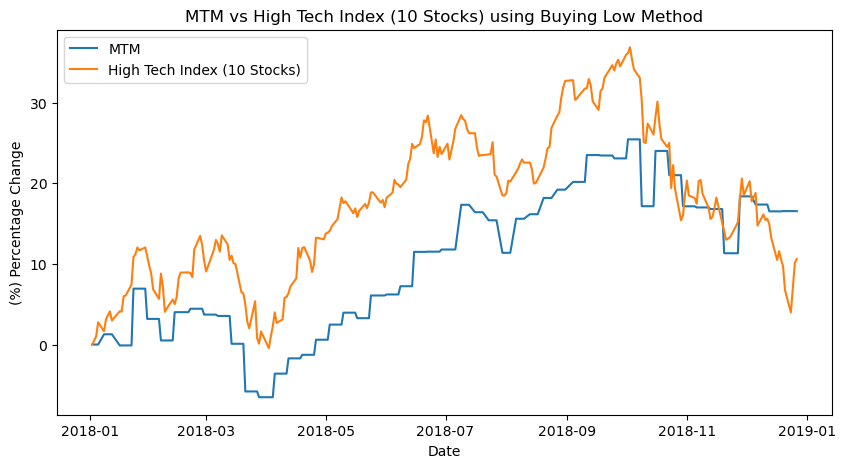

In [56]:
# Generating graphs for Minimum methods
import pandas as pd
import matplotlib.pyplot as plt

dates = market_stocks_values['Custom_Date'][:249]
df_pct_change = pd.DataFrame({'MTM': daily_mtm_pct_change[:249], 'High Tech Index': high_tech_index_pct_change[:249]}, index=dates)

plt.figure(figsize=(10, 5))
plt.plot(df_pct_change['MTM'], label='MTM')
plt.plot(df_pct_change['High Tech Index'], label='High Tech Index (10 Stocks)')
plt.xlabel('Date')
plt.ylabel('(%) Percentage Change')
plt.title('MTM vs High Tech Index (10 Stocks) using Buying Low Method')
plt.legend()
plt.show()


### <i> Using the this minimum methods the MTM performance is not that good by buy and selling stocks in comparions to maximum methods of buying stocks </i>

# Method 2: Using Buying High Method (Here we select the stocks value by 5 maximum stocks)

In [8]:
# Create a new column of data for loop iternation a conditional checking
market_stocks_values['Custom_Date'] = pd.to_datetime(market_stocks_values['Date'])
# Create a dataframe for all stocks to loop iteration
cal_high_inde_df = market_stocks_values[['IBM_Close','MSFT_Close','GOOG_Close','AAPL_Close','AMZN_Close','META_Close','NFLX_Close','TSLA_Close','ORCL_Close','SAP_Close']]

In [10]:
symbol_stocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

count = 1
dict_high_tech_index = []
daily_mtm = []
s=True
# Loop will run for all data ranges with that is 365 days 
for i in range(len(market_stocks_values)-1):
    
    dict_high_tech_index.append((np.average(cal_high_inde_df.iloc[i,:]))*1)

    # On intial day that is count of 1 of first day it will BUY stock
    if count==1:
        date_data = get_data_using_date(str((market_stocks_values['Custom_Date'][i]).date()))  
        # print(str((market_stocks_values['Custom_Date'][i]).date()))

        initial =i
        data = {}

        # Extracing my selected price
        for stock in my_selected_stocks:
            closing_stock_column = f"{stock}_Close"
            closing_stock_data = date_data[closing_stock_column].values.tolist()
            data[closing_stock_column] = closing_stock_data

        # Calling function for investment
        final_invested_amnt, cash_left_after_investment, amount_invested = invest_money_mtm(MTM, data, my_selected_stocks)
        # Calling function for investment
        final_invested_amnt, cash_left_after_investment, amount_invested = invest_money_mtm(MTM, data, my_selected_stocks)
        if s== True:
            s= False
            continue

    # On Every 5th day it will sell the stocks by selected methodology by MAX/MIN methods
    elif count==5:
        print("Genarate the 5 Maximum Stock")
        print(str((market_stocks_values['Custom_Date'][i]).date()))
        print()
        initial_bought_stocks = date_data

        # Cheking if it is Saturday and Sunday
        if (market_stocks_values['Custom_Date'][i]).date().weekday() == 6 or (market_stocks_values['Custom_Date'][i]).date().weekday() == 5:
           after_5_bought_stocks = get_data_using_date(str((market_stocks_values['Custom_Date'][i]+timedelta(days=1)).date())) 
           count +=1
        else:
            after_5_bought_stocks = get_data_using_date(str((market_stocks_values['Custom_Date'][i]).date()))

        # Getting data to get the Adj Closing stock value on the day stock purchased
        initial_data_close = get_adj_close_data_stocks(initial_bought_stocks, symbol_stocks)
        # Getting data to get the Adj Closing stock value on the day stock Sold
        after_5_data = get_adj_close_data_stocks(after_5_bought_stocks, symbol_stocks)

        difference_data = {}
        
        # Calculate the difference in percentage
        for stock in symbol_stocks:
            stock_adj_close_column = f"{stock}_Adj Close"
            after_5_days_value = after_5_data[stock_adj_close_column][0]
            initial_day_values = initial_data_close[stock_adj_close_column][0]
            difference_prcnt = ((after_5_days_value - initial_day_values)/initial_day_values) * 100
            difference_data[stock_adj_close_column] = difference_prcnt

        after_5_data = get_close_data_stocks(after_5_bought_stocks, my_selected_stocks)
        close_price_5_days, portfolios = get_data_close_price_portfolios(after_5_data, amount_invested)

        final_invested_amnt = 0

        # In this for loop we are making the portfolios data i.e. stock sold and purchased
        for stock, invested_data in amount_invested.items():
            stock_symbol = stock
            initial_invested_amount_data = invested_data['investment']
            shares_bought = invested_data['shares']
            
            close_price_after_5_days = close_price_5_days[stock]
           
            portfolio_value_after_5_days = shares_bought * close_price_after_5_days
            
            check_percent_changes = ((portfolio_value_after_5_days - initial_invested_amount_data) / initial_invested_amount_data) * 100
            final_invested_amnt += portfolio_value_after_5_days
            
            # Adding values the final amount and leftover cash
            MTM = final_invested_amnt + cash_left_after_investment
            cash = 0
            count=0
            original_list = list(pd.DataFrame(difference_data.items(), columns=['stock', 'Value']).sort_values(by='Value',ascending=False).head(5)['stock'])
            my_selected_stocks = [item.replace('_Adj Close', '') for item in original_list]
        print(my_selected_stocks)

    daily_mtm.append(MTM)
    count +=1 

    # In this function we will get the dividend values of each stock calculate the sharesc
    def myDividend(mydata):
        df = pd.read_csv(mydata)

        df['Close_ratio'] = df['Close'].shift(1) / df['Close']
        df['Adj_Close_ratio'] = df['Adj Close'].shift(1) / df['Adj Close']

        # Find the rows where the ratios are not equal
        dividend_rows = df[df['Close_ratio'] != df['Adj_Close_ratio']]

        # Calculate the dividends
        dividend_rows['Dividend'] = (dividend_rows['Close_ratio'] - dividend_rows['Adj_Close_ratio']) * dividend_rows['Close']

        # Select only Date and Dividend columns
        dividend_result = dividend_rows[['Date', 'Dividend']]

        result = pd.DataFrame(dividend_result)
        return result
    
    #In this loop we will call the dividend function and do calculation onn existing stock
    for i in list(amount_invested.keys()):
        res = myDividend(i+".csv")
        try:
            if len(res)>1: 
                val = list(res[res['Date']==str((market_stocks_values['Custom_Date'][i]).date())])[0]
                amount_invested[i]['shares']= val * amount_invested[i]['shares']
        except:
            continue

dict_high_tech_index.append(0)       
daily_mtm.append(0)

Genarate the 5 Maximum Stock
2018-01-09

['ORCL', 'SAP', 'AMZN', 'IBM', 'GOOG']
Genarate the 5 Maximum Stock
2018-01-17

['ORCL', 'AMZN', 'AAPL', 'IBM', 'GOOG']
Genarate the 5 Maximum Stock
2018-01-24

['NFLX', 'ORCL', 'AMZN', 'META', 'GOOG']
Genarate the 5 Maximum Stock
2018-01-31

['AMZN', 'MSFT', 'SAP', 'NFLX', 'GOOG']
Genarate the 5 Maximum Stock
2018-02-07

['SAP', 'ORCL', 'AMZN', 'TSLA', 'NFLX']
Genarate the 5 Maximum Stock
2018-02-14

['AAPL', 'AMZN', 'MSFT', 'GOOG', 'NFLX']
Genarate the 5 Maximum Stock
2018-02-22

['TSLA', 'AMZN', 'GOOG', 'AAPL', 'META']
Genarate the 5 Maximum Stock
2018-03-01

['NFLX', 'AAPL', 'AMZN', 'IBM', 'MSFT']
Genarate the 5 Maximum Stock
2018-03-08

['NFLX', 'GOOG', 'AMZN', 'META', 'ORCL']
Genarate the 5 Maximum Stock
2018-03-15

['AMZN', 'IBM', 'AAPL', 'META', 'GOOG']
Genarate the 5 Maximum Stock
2018-03-22

['ORCL', 'AMZN', 'SAP', 'NFLX', 'MSFT']
Genarate the 5 Maximum Stock
2018-03-29

['MSFT', 'ORCL', 'IBM', 'SAP', 'AAPL']
Genarate the 5 Maximum Sto

In [12]:
Data = amount_invested

# Initialize total_investment to 0
total_investment = 0

# Iterate through the values of the inner dictionaries and sum up the 'investment' values
for company_data in Data.values():
    total_investment += company_data['investment']

print(f"The total investment is: {total_investment}")


The total investment is: 4087810.97557


In [11]:
print(f"Final Revenue Generated by the end of the year by Maximum method {MTM}")

Final Revenue Generated by the end of the year by Maximum method 3841046.8300519916


In [13]:
initial_index_value = market_stocks_values[market_stocks_values['Custom_Date'] == '2018-01-02'].index[0]

mtm_initail_investment = daily_mtm[initial_index_value]
hti_initial_investment = dict_high_tech_index[initial_index_value]

daily_mtm_pct_change = [(x / mtm_initail_investment - 1) * 100 for x in daily_mtm]
high_tech_index_pct_change = [(x / hti_initial_investment - 1) * 100 for x in dict_high_tech_index]


In [25]:
daily_mtm_pct_change[249]=np.nan
# high_tech_index_pct_change[249]=np.nan


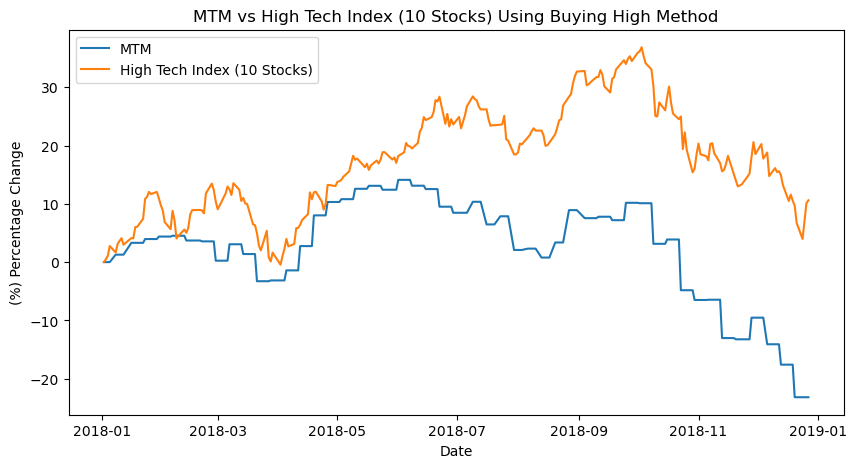

In [26]:
# Generating graphs for Maximum methods
import pandas as pd
import matplotlib.pyplot as plt

dates = market_stocks_values['Custom_Date']
df_pct_change = pd.DataFrame({'MTM': daily_mtm_pct_change, 'High Tech Index': high_tech_index_pct_change[:250]}, index=dates[:250])

plt.figure(figsize=(10, 5))
plt.plot(df_pct_change['MTM'], label='MTM')
plt.plot(df_pct_change['High Tech Index'], label='High Tech Index (10 Stocks)')
plt.xlabel('Date')
plt.ylabel('(%) Percentage Change')
plt.title('MTM vs High Tech Index (10 Stocks) Using Buying High Method')
plt.legend()
plt.show()


### <i> Using the this maximum methods the MTM performance is really great by buy and selling stocks in comparions to minimum methods of buying stocks </i>

8. Download the USD/JPY 2018 historical data at https://finance.yahoo.com/quote/JPY%3DX/history?period1=1514764800&period2=1546300800&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true then use the "Close" column as the rate to convert your MTM series from USD to JPY. Plot the two MTM curves. You will need to convert to daily percentage change too.


9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

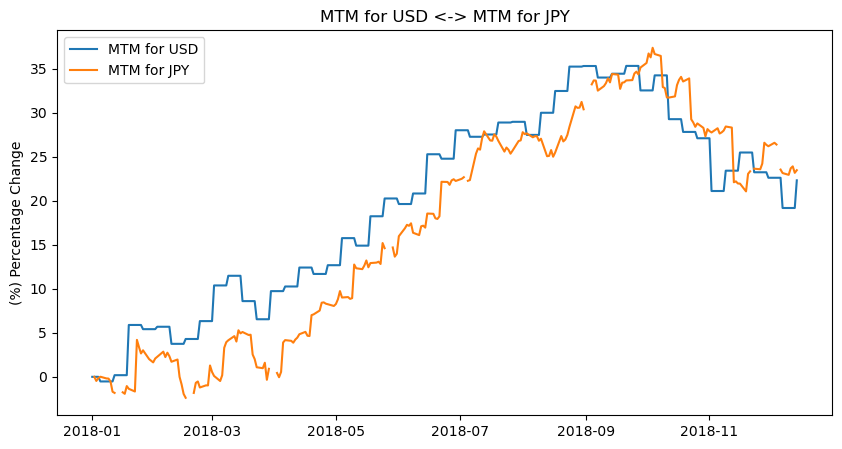

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

usd_jpy_covert_data = pd.read_csv('JP2.csv', parse_dates=['Date'], index_col='Date')
usd_jpy_covert_data = usd_jpy_covert_data[['Close']]

mtm_in_usd = pd.Series(daily_mtm, index=dates)
mtm_in_jpy = mtm_in_usd * usd_jpy_covert_data['Close'][:251]

usd_jpy_covert_data['Custom_Date'] = pd.to_datetime(usd_jpy_covert_data.index)

initial_index_value = usd_jpy_covert_data[usd_jpy_covert_data['Custom_Date'] == '2018-01-02'].index[0]
mtm_in_jpy_currency = mtm_in_jpy[initial_index_value]
daily_mtm_pct_change_jyp = [(x / mtm_in_jpy_currency - 1) * 100 for x in mtm_in_jpy]
df_pct_change_jpy = pd.DataFrame({'MTM for USD': daily_mtm_pct_change, 'MTM for JPY': daily_mtm_pct_change_jyp[:251]}, index=usd_jpy_covert_data['Custom_Date'][:251])

df_pct_change_jpy.iloc[250] = np.NaN

plt.figure(figsize=(10, 5))
plt.plot(df_pct_change_jpy['MTM for USD'], label='MTM for USD')
plt.plot(df_pct_change_jpy['MTM for JPY'], label='MTM for JPY')

plt.ylabel('(%) Percentage Change')
plt.title('MTM for USD <-> MTM for JPY')
plt.legend()
plt.show()


### 9. The above two strategies both rebalance every 5 days. Try to change the days interval and find the optimal days interval that maximizes the MTM on 12/31/2018. 

In [ ]:
symbol_stocks = ['IBM', 'MSFT', 'GOOG', 'AAPL', 'AMZN', 'META', 'NFLX', 'TSLA', 'ORCL', 'SAP']

# Loop will run for all data ranges with that is 365 days
def cal_all_interval_mtm(day):
    my_selected_stocks = random.sample(symbol_stocks,5)
    count = 1
    dict_high_tech_index = []
    daily_mtm = []
    day_interval_MTM={}
    MTM = 5000000

    for i in range(len(market_stocks_values)-1):
        
        dict_high_tech_index.append((np.average(cal_high_inde_df.iloc[i,:]))*1)

        # On intial day that is count of 1 of first day it will BUY stock
        if count==1:
            date_data = get_data_using_date(str((market_stocks_values['Custom_Date'][i]).date()))  

            initial =i
            data = {}

            # Extracing my selected price 
            for stock in my_selected_stocks:
                closing_stock_column = f"{stock}_Close"
                closing_stock_data = date_data[closing_stock_column].values.tolist()
                data[closing_stock_column] = closing_stock_data

            # Calling function for investment
            final_invested_amnt, cash_left_after_investment, amount_invested = invest_money_mtm(MTM, data, my_selected_stocks)

        # On Every 5th day it will sell the stocks by selected methodology by MAX/MIN methods
        elif count==day:

            initial_bought_stocks = date_data

            # Cheking if it is Saturday and Sunday
            if (market_stocks_values['Custom_Date'][i]).date().weekday() == 6 or (market_stocks_values['Custom_Date'][i]).date().weekday() == 5:
                after_5_bought_stocks = get_data_using_date(str((market_stocks_values['Custom_Date'][i]+timedelta(days=1)).date())) 
                count +=1
            else:
                after_5_bought_stocks = get_data_using_date(str((market_stocks_values['Custom_Date'][i]).date()))

            # Getting data to get the Adj Closing stock value on the day stock purchased
            initial_data_close = get_adj_close_data_stocks(initial_bought_stocks, symbol_stocks)
            # Getting data to get the Adj Closing stock value on the day stock Sold
            after_5_data = get_adj_close_data_stocks(after_5_bought_stocks, symbol_stocks)

            difference_data = {}

            # Calculate the difference in percentage
            for stock in symbol_stocks:
                stock_adj_close_column = f"{stock}_Adj Close"
                after_5_days_value = after_5_data[stock_adj_close_column][0]
                initial_day_values = initial_data_close[stock_adj_close_column][0]
                difference_prcnt = ((after_5_days_value - initial_day_values)/initial_day_values) * 100
                difference_data[stock_adj_close_column] = difference_prcnt

            after_5_data = get_close_data_stocks(after_5_bought_stocks, my_selected_stocks)
            close_price_5_days, portfolios = get_data_close_price_portfolios(after_5_data, amount_invested)

            final_invested_amnt = 0

            # In this for loop we are making the portfolios data i.e. stock sold and purchased
            for stock, invested_data in amount_invested.items():
                stock_symbol = stock
                initial_invested_amount_data = invested_data['investment']
                shares_bought = invested_data['shares']
                
                close_price_after_5_days = close_price_5_days[stock]
            
                portfolio_value_after_5_days = shares_bought * close_price_after_5_days
                
                check_percent_changes = ((portfolio_value_after_5_days - initial_invested_amount_data) / initial_invested_amount_data) * 100
                final_invested_amnt += portfolio_value_after_5_days
                
                # Adding values the final amount and leftover cash
                MTM = final_invested_amnt + cash_left_after_investment
                cash = 0
                count=0
                original_list = list(pd.DataFrame(difference_data.items(), columns=['stock', 'Value']).sort_values(by='Value',ascending=True).head(5)['stock'])
                my_selected_stocks = [item.replace('_Adj Close', '') for item in original_list]
            # print(my_selected_stocks)

        daily_mtm.append(MTM)
        count +=1 

        # In this function we will get the dividend values of each stock calculate the shares
        def myDividend(mydata):
            df = pd.read_csv(mydata)

            df['Close_ratio'] = df['Close'].shift(1) / df['Close']
            df['Adj_Close_ratio'] = df['Adj Close'].shift(1) / df['Adj Close']

            # Find the rows where the ratios are not equal
            dividend_rows = df[df['Close_ratio'] != df['Adj_Close_ratio']]

            # Calculate the dividends
            dividend_rows['Dividend'] = (dividend_rows['Close_ratio'] - dividend_rows['Adj_Close_ratio']) * dividend_rows['Close']

            # Select only Date and Dividend columns
            dividend_result = dividend_rows[['Date', 'Dividend']]

            result = pd.DataFrame(dividend_result)
            return result

        #In this loop we will call the dividend function and do calculation onn existing stock
        for i in list(amount_invested.keys()):
            res = myDividend(i+".csv")
            try:
                if len(res)>1: 
                    val = list(res[res['Date']==str((market_stocks_values['Custom_Date'][i]).date())])[0]
                    amount_invested[i]['shares']= val * amount_invested[i]['shares']
            except:
                continue
    day_interval_MTM[str(day)+" Interval Selling Stocks"]=MTM

    dict_high_tech_index.append(0)       
    daily_mtm.append(0)

    return MTM

In [ ]:
day_interval= range(1,200)

df = pd.DataFrame(columns=['Interval for selling', 'MTM'])

for day in day_interval:
    val = cal_all_interval_mtm(day)
    df = df.append({'Interval for selling': int(day), 'MTM': val}, ignore_index=True)



In [ ]:
df.sort_values(by="MTM",ascending=False)

,Interval for selling,MTM
128,129.0,7004613.493288
181,182.0,6939300.70572
186,187.0,6934743.678224
189,190.0,6931441.656676
166,167.0,6891898.13141
...,...,...
11,12.0,4472907.35448
81,82.0,4459057.679928
82,83.0,4423204.862858
9,10.0,4354000.872352


## Conclusion:
- We started buying stocks and on every fifth day we sold it with considering all the dividends values inside the cashflow calculation.

- On every interation we took the different stock values inside it with lowest value by run the python code above we did for the whole year and get final revenue at the end of the year.

- During the initial start of the year we started with low percentage rate as the market returns very less due shares returns value after investment very low.

- According to the trends in the graphs in the month of March and May we hit the loweest in percentage change with less revenue as the overall market peformance seems to bad with less revenue generated.

- But as the year the progress and the stability of the market we started generating larger revenue change if pecentages show a gradual increase.

- By the end of the there was little bit a steep downfall with decreased out percentage change in revenue by the end of the year 

- If we see the overall trends we generate a good profit margin as due the start of year we had very less returns and the gradually with some high return as the year progress by buying at low and selling at high price on every 5th Day with minimal loss.

- The MTM for the USD and JPY relvoved with the same values with slight subtle different values of percentage change in it with similar kind of fluctions in it.

- By using the Buying by High method of selecting 5 stocks gave us the Lowest MTM value of and by other Buying by High  method MTM is really good for the 5 days interval
- After using the buying low method we created loop and checked which interval is optimal.
- Buy Selling the stocks in 129 day interval will the give the highest MTM 7004613.49 with highest profit